<a href="https://colab.research.google.com/github/sarthakkar99/Capstone_peer_to_per_lending/blob/main/peer_to_peer_lending_combine2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 73kB/s 
     |████████████████████████████████| 3.8MB 42.7MB/s 
     |████████████████████████████████| 450kB 42.9MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [ ]:
 import tensorflow as tf
 help(tf)

Help on package tensorflow:

NAME
    tensorflow - TensorFlow root package

PACKAGE CONTENTS


DATA
    __compiler_version__ = '7.3.1 20180303'
    __cxx11_abi_flag__ = 0
    __git_version__ = 'v2.0.0-rc2-26-g64c3d38'
    __monolithic_build__ = 0
    bfloat16 = tf.bfloat16
    bool = tf.bool
    complex128 = tf.complex128
    complex64 = tf.complex64
    double = tf.float64
    float16 = tf.float16
    float32 = tf.float32
    float64 = tf.float64
    half = tf.float16
    int16 = tf.int16
    int32 = tf.int32
    int64 = tf.int64
    int8 = tf.int8
    newaxis = None
    qint16 = tf.qint16
    qint32 = tf.qint32
    qint8 = tf.qint8
    quint16 = tf.quint16
    quint8 = tf.quint8
    resource = tf.resource
    string = tf.string
    uint16 = tf.uint16
    uint32 = tf.uint32
    uint64 = tf.uint64
    uint8 = tf.uint8
    variant = tf.variant

VERSION
    2.0.0

FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,Softmax
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

Using TensorFlow backend.


# Data loading


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crx2.csv to crx2.csv


In [ ]:
data= pd.read_csv('crx2.csv')
data.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit1.csv to credit1.csv


In [ ]:
data1= pd.read_csv('credit1.csv')
data1.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


# label encoding

In [ ]:
label_encoder=LabelEncoder()
print(type(data['C1'].values[0]))
columns=data.columns
for cols in columns:
   # print(cols)
    if(isinstance(data[cols].values[0],str)):
        data[cols]=label_encoder.fit_transform(data[cols].values)

<class 'numpy.int64'>


In [ ]:
label_encoder=LabelEncoder()
print(type(data1['checking_balance'].values[0]))
columns=data1.columns
for cols in columns:
   # print(cols)
    if(isinstance(data1[cols].values[0],str)):
        data1[cols]=label_encoder.fit_transform(data1[cols].values)

<class 'numpy.int64'>


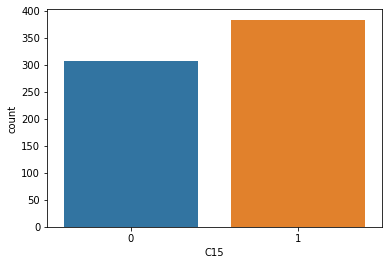

In [ ]:
sns.countplot(data['C15'])

In [ ]:
data1.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,2,1,0,1,1
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,1,2,0,1,3
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,2,2,0,1,1


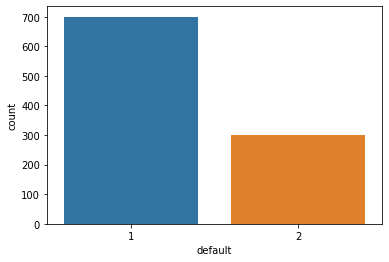

In [ ]:
sns.countplot(data1['default'])

# data cleaning

In [ ]:
print(type(data['C1'].values[86]),data['C1'].values[98])

<class 'numpy.int64'> 69


In [ ]:
data1.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [ ]:
x=data.drop(['C15'],axis=1).values
y=data['C15'].values


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=False)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
print(X_train.shape,X_test.shape)

(552, 15) (138, 15)


In [ ]:
x1=data1.drop(['default'],axis=1).values
y1=data1['default'].values


In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x1,y1,stratify=y1,test_size=0.2,random_state=False)
scaler=StandardScaler()
x_train1=scaler.fit_transform(X_train1)
x_test1=scaler.transform(X_test1)
print(X_train1.shape,X_test1.shape)

(800, 20) (200, 20)


In [ ]:
Y_train1.shape

(800,)

0.73
[[133  47]
 [  7  13]]


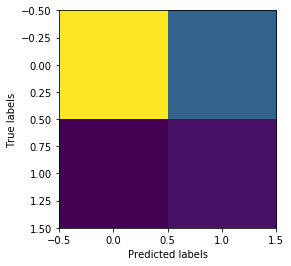

In [ ]:
svm=SVC()
svm.fit(x_train1,Y_train1)
y_pred=svm.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))
print(confusion_matrix(y_pred,Y_test1))
plt.imshow(confusion_matrix(y_pred,Y_test1))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

0.8840579710144928
[[57 12]
 [ 4 65]]


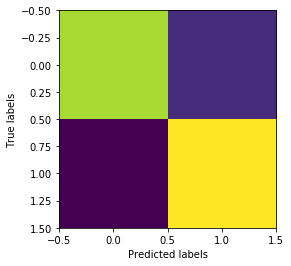

In [ ]:
svm=SVC()
svm.fit(x_train,Y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,Y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_pred,Y_test))

0.8840579710144928


In [ ]:
lr=LogisticRegression()
lr.fit(x_train1,Y_train1)
y_pred=lr.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))

0.715


0.66
[[101  29]
 [ 39  31]]


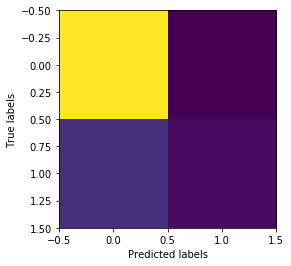

In [ ]:
Nb= GaussianNB()
Nb.fit(x_train1,Y_train1)
y_pred=Nb.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))
print(confusion_matrix(y_pred,Y_test1))
plt.imshow(confusion_matrix(y_pred,Y_test1))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

0.8043478260869565
[[40  6]
 [21 71]]


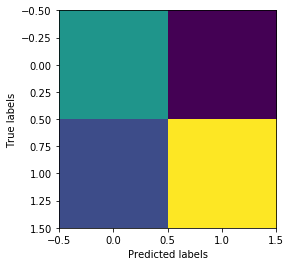

In [ ]:
Nb= GaussianNB()
Nb.fit(x_train,Y_train)
y_pred=Nb.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
class Naive_bayes_classifier:
    def fit(self,X,Y):
        self.mean_x=X.mean(axis=0)
        self.std_x=np.std(X,axis=0)
        self.mean_y=Y.mean()
        self.std_y=np.std(Y)
        self.total=Y.shape[0]
        self.Y=Y
        print(self.mean_x.shape)
        print(self.std_x.shape)
        print(self.mean_y)
        print(self.std_y)
        self.cls=np.unique(Y)
        seperated_class={}
        for c in self.cls:
            print(c)
            seperated_class[c]=list()
            for j in range(Y.shape[0]):
                if c==Y[j]:
                    seperated_class[c].append(list(X[j]))
        print(np.array(seperated_class[1]).shape)
        self.sumarize={}
        for labels in seperated_class:
            self.sumarize[labels]=list()
           # print(np.array(seperated_class[labels]).shape)
            for cols in zip(*np.array(seperated_class[labels])):
                self.sumarize[labels].append([np.array(cols).mean(),np.array(cols).std()])
    def calculate_probablity(self,X,mean_std):
            pdf=1
            for x,cols in zip(X,mean_std):
                m=cols[0]
                std=cols[1]
                #print(m,std,x)
                #print(std)
                if(round(std,3)>0):
                    exponent = math.exp(-(math.pow(x-m,2)/(2*math.pow(std,2))))
                    if(exponent!=0):
                        gus=(1/(math.sqrt(2*math.pi)*std))*exponent
                        pdf=pdf*gus
            return pdf
    def predict(self,X):
            y_pred=[]
            P_den=0
            for x in X:
                y_prob=[]
                for c in self.cls:
                    P_x_given_y=self.calculate_probablity(x,self.sumarize[c])
                    P_c=list(self.Y).count(c)/self.Y.shape[0]
                    #P_den+= P_x_given_y*P_c
                    #print(P_x_given_y*P_c,end=' ')
                    y_prob.append(P_x_given_y*P_c)
                y_prob=np.array(y_prob)
                #print(np.argmax(y_prob,axis=0))
                y_pred.append(np.argmax(y_prob,axis=0))
            return y_pred
                    
                    
                #print(Px)
                
                
  
        
model=Naive_bayes_classifier()
X_train1=X_train1.astype('float64')
model.fit(X_train1,Y_train1)
y_pred=model.predict(X_test1)
print(accuracy_score(y_pred,Y_test1))

(20,)
(20,)
1.3
0.45825756949558394
1
2
(560, 20)
0.195


In [ ]:
class Naive_bayes_classifier:
    def fit(self,X,Y):
        self.mean_x=X.mean(axis=0)
        self.std_x=np.std(X,axis=0)
        self.mean_y=Y.mean()
        self.std_y=np.std(Y)
        self.total=Y.shape[0]
        self.Y=Y
        print(self.mean_x.shape)
        print(self.std_x.shape)
        print(self.mean_y)
        print(self.std_y)
        self.cls=np.unique(Y)
        seperated_class={}
        for c in self.cls:
            print(c)
            seperated_class[c]=list()
            for j in range(Y.shape[0]):
                if c==Y[j]:
                    seperated_class[c].append(list(X[j]))
        print(np.array(seperated_class[1]).shape)
        self.sumarize={}
        for labels in seperated_class:
            self.sumarize[labels]=list()
           # print(np.array(seperated_class[labels]).shape)
            for cols in zip(*np.array(seperated_class[labels])):
                self.sumarize[labels].append([np.array(cols).mean(),np.array(cols).std()])
    def calculate_probablity(self,X,mean_std):
            pdf=1
            for x,cols in zip(X,mean_std):
                m=cols[0]
                std=cols[1]
                #print(m,std,x)
                #print(std)
                if(round(std,3)>0):
                    exponent = math.exp(-(math.pow(x-m,2)/(2*math.pow(std,2))))
                    if(exponent!=0):
                        gus=(1/(math.sqrt(2*math.pi)*std))*exponent
                        pdf=pdf*gus
            return pdf
    def predict(self,X):
            y_pred=[]
            P_den=0
            for x in X:
                y_prob=[]
                for c in self.cls:
                    P_x_given_y=self.calculate_probablity(x,self.sumarize[c])
                    P_c=list(self.Y).count(c)/self.Y.shape[0]
                    #P_den+= P_x_given_y*P_c
                    #print(P_x_given_y*P_c,end=' ')
                    y_prob.append(P_x_given_y*P_c)
                y_prob=np.array(y_prob)
                #print(np.argmax(y_prob,axis=0))
                y_pred.append(np.argmax(y_prob,axis=0))
            return y_pred
                    
                    
                #print(Px)
                
                
  
        
model=Naive_bayes_classifier()
X_train1=X_train.astype('float64')
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,Y_test))

(15,)
(15,)
0.5543478260869565
0.4970375376162468
0
1
(306, 15)
0.8043478260869565


0.8768115942028986
[[50  6]
 [11 71]]


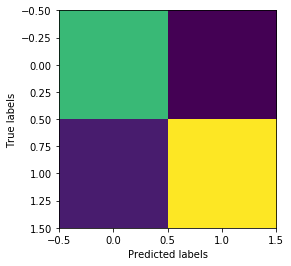

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,Y_train)
y_pred=kn.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

0.705
[[118  37]
 [ 22  23]]


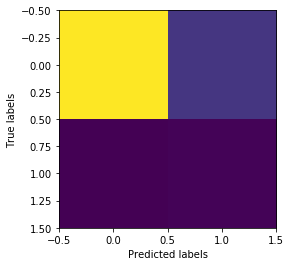

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train1,Y_train1)
y_pred=kn.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))
print(confusion_matrix(y_pred,Y_test1))
plt.imshow(confusion_matrix(y_pred,Y_test1))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
l=[]
Y_pred=[]
def distance(x_test,K):
    l=[]
    for i in range(X_train1.shape[0]):
        s=0
        for j,t in zip(x_train1[i],x_test):
            s+=(t-j)**2
        l.append((np.sqrt(s),Y_train1[i]))
       # print(l)
    l.sort()
    l_min=[]
    #print(l)
    for k in range(K):
        l_min.append(l[k])
    l_lables=[]
    #print(l_min)
    for i in l_min:
     l_lables.append(i[1])
    Y_pred.append(most_frequent(l_lables))
    #Y_pred.append((min(l_min))[1])

def most_frequent(List):
    return max(set(List),key=List.count)
for i in range(X_test1.shape[0]):
    distance(x_test1[i],5)#change here for different k value for getting better accuracy
#print(Y_pred,Y_test)
print(accuracy_score(Y_pred,Y_test1))



0.66


In [ ]:
l=[]
Y_pred=[]
def distance(x_test,K):
    l=[]
    for i in range(X_train.shape[0]):
        s=0
        for j,t in zip(x_train[i],x_test):
            s+=(t-j)**2
        l.append((np.sqrt(s),Y_train[i]))
       # print(l)
    l.sort()
    l_min=[]
    #print(l)
    for k in range(K):
        l_min.append(l[k])
    l_lables=[]
    #print(l_min)
    for i in l_min:
     l_lables.append(i[1])
    Y_pred.append(most_frequent(l_lables))
    #Y_pred.append((min(l_min))[1])

def most_frequent(List):
    return max(set(List),key=List.count)
for i in range(X_test.shape[0]):
    distance(x_test[i],5)#change here for different k value for getting better accuracy
#print(Y_pred,Y_test)
print(accuracy_score(Y_pred,Y_test))

0.8768115942028986


15
15


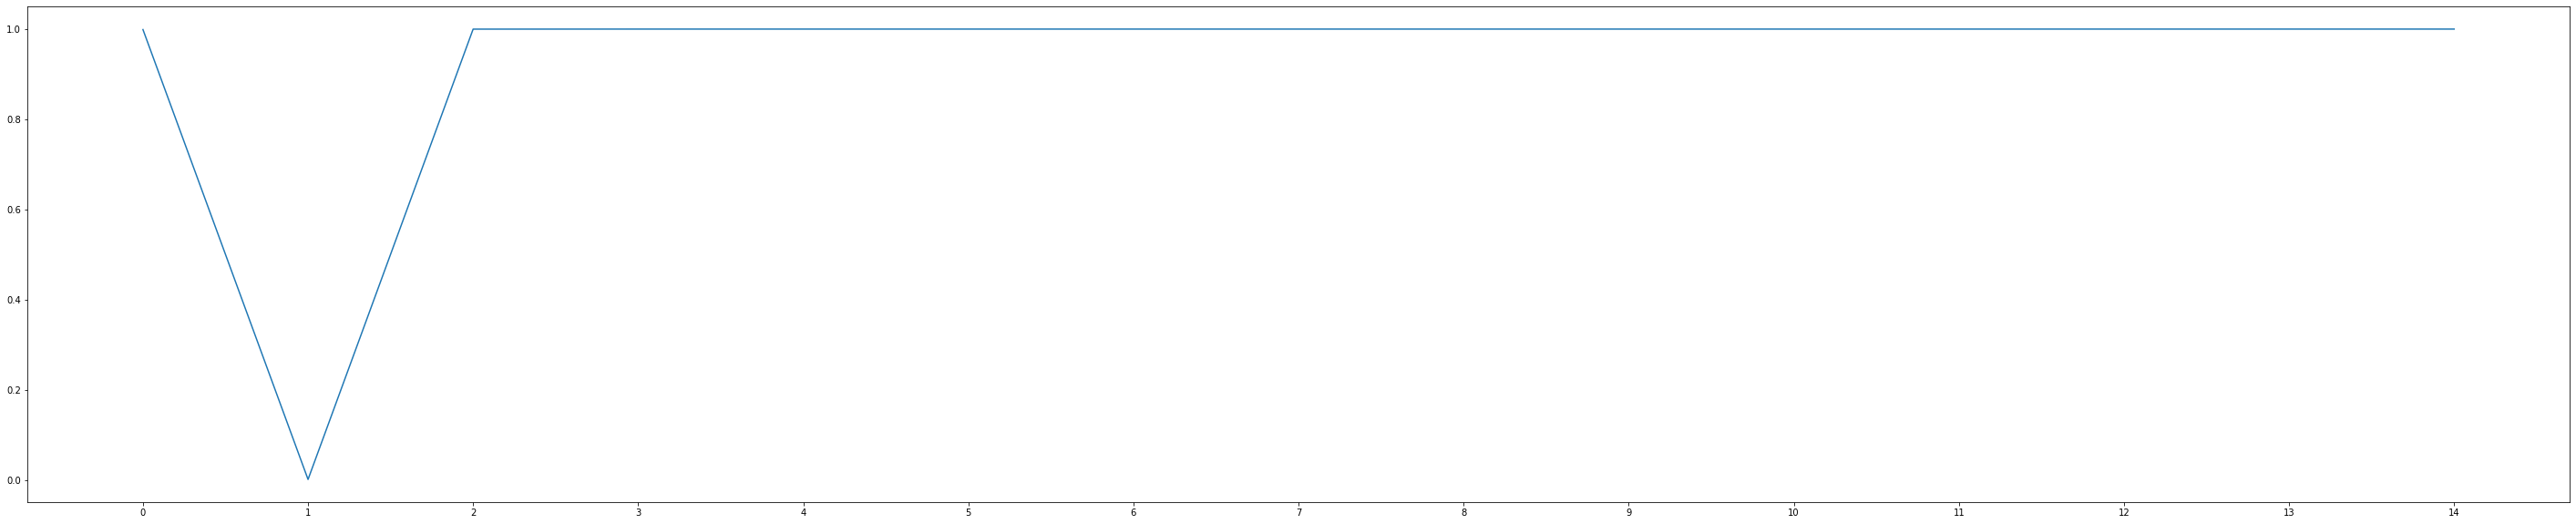

(15, 15)


In [ ]:
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler

S=np.dot(X_train1.T,X_train1)
#print(S)
eign_value,eign_vect=LA.eig(S)
print(len(eign_value))
eig_sort=np.argsort(eign_value)[::-1]
eig_vect_sort=None
for i in eig_sort:
   if eig_vect_sort is None:
     eig_vect_sort=eign_vect[i]
   else:
     eig_vect_sort=np.vstack((eig_vect_sort,eign_vect[i]))
eig_vect_sort=eig_vect_sort.T 
S_=np.dot(S,eig_vect_sort)
#print(S_)
propotion_variance=[]
c=0
s=0
for v in eign_value:
      f=v
      if(c==0 or c==1):
       #print(v/sum(eign_value))
       propotion_variance.append(f/sum(eign_value))
      else:
        #print(s/sum(eign_value))
        propotion_variance.append(s/sum(eign_value))
      s=s+f
      c+=1
print(len(propotion_variance))
plt.figure(figsize=(50,10))
import matplotlib.pyplot as plt
cols=[i for i in range(len(eign_value))]
plt.plot(cols, propotion_variance)
plt.xticks(cols)
plt.show()
print(eig_vect_sort.shape)

In [ ]:
np.random.seed(0)
class Logistic:
    def __init__(self):
            self.w=np.random.randn(x_train.shape[1])/(x_train.shape[1]**0.5)
            self.b=0
            self.v_w=0
            self.m_w=0
            self.v_b=0
            self.m_b=0
    def sigmoid(self,x):
         return(1/(1+np.exp(-x)))
    def loss(self,y,fx):
        return ((fx-y)**2)
    def fit(self,X,Y,eta):
        beta_1=0.9
        beta_2=0.99
        
        for t in range(100):
            dw=0
            db=0
            self.Loss=0
            self.Y_pred=[]
            self.Y_true=[]
            epsilon=1e-10
            num=0
            for x,y in zip(X,Y):
                self.a=np.dot(x,self.w)+self.b
                p=self.sigmoid(self.a)
                if(p>=0.5):
                    fx=2
                else:
                    fx=1
                #self.Loss=self.Loss+self.loss(y,fx)
            self.w=self.w+eta*x
            self.b=self.b-eta*1
        #print("Epochs {}-----------loss {}".format(t,self.Loss))
    def predict(self,x_test):
            pred=[]
            for x in x_test:
                self.a=np.dot(x,self.w)+self.b
                p=self.sigmoid(self.a)
                #print(p)
                if(p>=0.5):
                    fx=2
                else:
                    fx=1
                pred.append(fx)
            return(pred)
                
model=Logistic()
model.fit(X_train,Y_train,eta=0.1)


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
Y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0])

In [ ]:
Y_test1

array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1])

In [ ]:
ohe = OneHotEncoder(categories='auto')
Y_cat_train= ohe.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_cat_test= ohe.fit_transform(Y_test.reshape(-1,1)).toarray()
Y_cat_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
ohe = OneHotEncoder(categories='auto')
Y_cat_train1= ohe.fit_transform(Y_train1.reshape(-1,1)).toarray()
Y_cat_test1= ohe.fit_transform(Y_test1.reshape(-1,1)).toarray()
Y_cat_train1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

# Artificial neural Network

In [ ]:
model=Sequential()
model.add(Dense(12,input_dim=15))
model.add(Dense(4))
model.add(Dense(2,activation='softmax'))

In [ ]:
 import tensorflow as tf
 print(tf.__version__)

2.0.0


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_cat_train,epochs=200,validation_data=(X_test,Y_cat_test),verbose=1)

Train on 552 samples, validate on 138 samples
Epoch 1/200
552/552 [==============================] - 1s 1ms/sample - loss: 460.3250 - accuracy: 0.5543 - val_loss: 203.5385 - val_accuracy: 0.5580
Epoch 2/200
552/552 [==============================] - 0s 96us/sample - loss: 308.9339 - accuracy: 0.5507 - val_loss: 133.4974 - val_accuracy: 0.5435
Epoch 3/200
552/552 [==============================] - 0s 85us/sample - loss: 183.3150 - accuracy: 0.5453 - val_loss: 60.4698 - val_accuracy: 0.5435
Epoch 4/200
552/552 [==============================] - 0s 91us/sample - loss: 55.7936 - accuracy: 0.5489 - val_loss: 13.5547 - val_accuracy: 0.5725
Epoch 5/200
552/552 [==============================] - 0s 118us/sample - loss: 8.8125 - accuracy: 0.6558 - val_loss: 16.3895 - val_accuracy: 0.5797
Epoch 6/200
552/552 [==============================] - 0s 109us/sample - loss: 7.9499 - accuracy: 0.6286 - val_loss: 14.8801 - val_accuracy: 0.5797
Epoch 7/200
552/552 [==============================] - 0s 96us

In [ ]:
model1=Sequential()
model1.add(Dense(12,input_dim=20))
model1.add(Dense(4))
model1.add(Dense(2,activation='relu'))

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(40, input_shape=(20,), activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_cat_train,epochs=200,validation_data=(X_test,Y_cat_test),verbose=1)

Train on 552 samples, validate on 138 samples
Epoch 1/200
552/552 [==============================] - 0s 98us/sample - loss: 0.3569 - accuracy: 0.8587 - val_loss: 0.3168 - val_accuracy: 0.8696
Epoch 2/200
552/552 [==============================] - 0s 85us/sample - loss: 0.3644 - accuracy: 0.8605 - val_loss: 0.3507 - val_accuracy: 0.8623
Epoch 3/200
552/552 [==============================] - 0s 90us/sample - loss: 0.4789 - accuracy: 0.8496 - val_loss: 0.9824 - val_accuracy: 0.7609
Epoch 4/200
552/552 [==============================] - 0s 89us/sample - loss: 0.4743 - accuracy: 0.8333 - val_loss: 0.3196 - val_accuracy: 0.8768
Epoch 5/200
552/552 [==============================] - 0s 91us/sample - loss: 0.3809 - accuracy: 0.8587 - val_loss: 0.3099 - val_accuracy: 0.8478
Epoch 6/200
552/552 [==============================] - 0s 98us/sample - loss: 1.7543 - accuracy: 0.7736 - val_loss: 5.3804 - val_accuracy: 0.6812
Epoch 7/200
552/552 [==============================] - 0s 90us/sample - loss: 

In [ ]:
y_pred=model.predict(x_test)
print(np.argmax(y_pred,axis=1))
print(accuracy_score(np.argmax(y_pred.round(),axis=1),np.argmax(Y_cat_test,axis=1)))
print(confusion_matrix(np.argmax(y_pred.round(),axis=1),np.argmax(Y_cat_test,axis=1)))

[0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0]
0.8623188405797102
[[58 16]
 [ 3 61]]


In [ ]:
scores_svm =cross_val_score(SVC(gamma='auto'), x, y, cv=10)
print(scores_svm.mean())

0.553623188405797


In [ ]:
scores_NB =cross_val_score(Nb, x, y, cv=10)
print(scores_NB.mean())

0.7884057971014493


In [ ]:
scores_kn =cross_val_score(kn, x, y, cv=10)
print(scores_kn.mean())

0.6594202898550725


In [ ]:
result={'svm':scores_svm,'knn':scores_kn,'Nb':scores_NB}
performance_matrix=pd.DataFrame(result,columns=['svm','knn','Nb'])

In [ ]:
performance_matrix

,svm,knn,Nb
0,0.550725,0.623188,0.666667
1,0.550725,0.681159,0.768116
2,0.550725,0.724638,0.855072
3,0.536232,0.652174,0.797101
4,0.550725,0.695652,0.768116
5,0.550725,0.681159,0.797101
6,0.550725,0.681159,0.768116
7,0.565217,0.579710,0.768116
8,0.565217,0.652174,0.884058
9,0.565217,0.623188,0.811594
